In [1]:
import pandas as pd

import numpy as np 

from fbprophet import Prophet

import matplotlib.pyplot as plt

from datetime import date

pd.plotting.register_matplotlib_converters()

# Número de casos no mundo

In [2]:
casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
casos.tail(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,3,4,4,4,4,4,6,6,6
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,2,2,3,3,3,3,3,3
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,1,2,2,2,4,6,6,6
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,2,2
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,3,3,4,4,5,8
258,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,4
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4


In [3]:
casosMundo = np.sum(casos.iloc[:,4:casos.shape[1]])
casosMundo.index = pd.DatetimeIndex(casosMundo.index)
casosMundo.tail(10)

2020-03-29     720140
2020-03-30     782395
2020-03-31     857487
2020-04-01     932605
2020-04-02    1013320
2020-04-03    1095917
2020-04-04    1197405
2020-04-05    1272115
2020-04-06    1345101
2020-04-07    1426096
dtype: int64

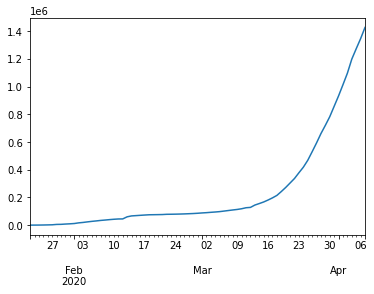

In [4]:
casosMundo.plot()

# Número de mortes

In [5]:
mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
mortes.tail(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
258,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mortesMundo = np.sum(mortes.iloc[:,4:mortes.shape[1]])
mortesMundo.index = pd.DatetimeIndex(mortesMundo.index)
mortesMundo.tail(10)

2020-03-29    33925
2020-03-30    37582
2020-03-31    42107
2020-04-01    46809
2020-04-02    52983
2020-04-03    58787
2020-04-04    64606
2020-04-05    69374
2020-04-06    74565
2020-04-07    81865
dtype: int64

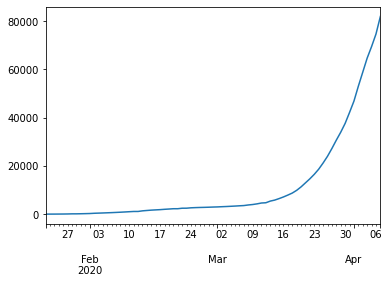

In [7]:
mortesMundo.plot()

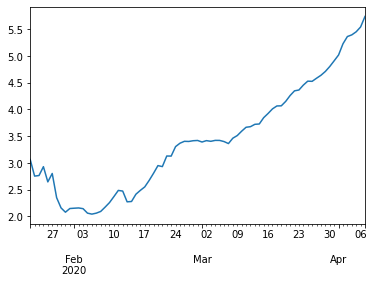

In [8]:
mortalidade = 100*(mortesMundo/casosMundo)
mortalidade.plot()

# Número de recuperações

In [9]:
recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recuperados.tail(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
239,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
244,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
recuperadosMundo = np.sum(recuperados.iloc[:,4:recuperados.shape[1]])
recuperadosMundo.index = pd.DatetimeIndex(recuperadosMundo.index)
recuperadosMundo.tail(10)

2020-03-29    149082
2020-03-30    164566
2020-03-31    178034
2020-04-01    193177
2020-04-02    210263
2020-04-03    225796
2020-04-04    246152
2020-04-05    260012
2020-04-06    276515
2020-04-07    300054
dtype: int64

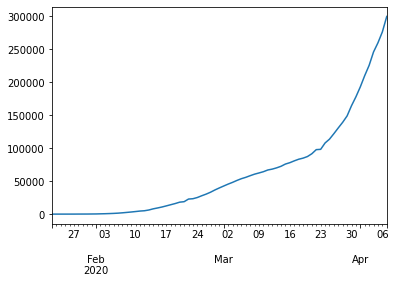

In [11]:
recuperadosMundo.plot()

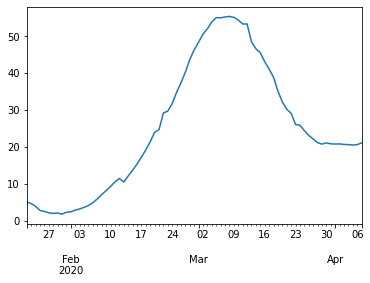

In [12]:
taxaRecuperacao = 100*(recuperadosMundo/casosMundo)
taxaRecuperacao.plot()

# Número de ativos

In [13]:
ativosMundo = casosMundo - (mortesMundo + recuperadosMundo)
ativosMundo.tail(10)

2020-03-29     537133
2020-03-30     580247
2020-03-31     637346
2020-04-01     692619
2020-04-02     750074
2020-04-03     811334
2020-04-04     886647
2020-04-05     942729
2020-04-06     994021
2020-04-07    1044177
dtype: int64

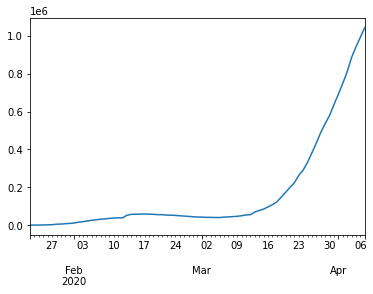

In [14]:
ativosMundo.plot()

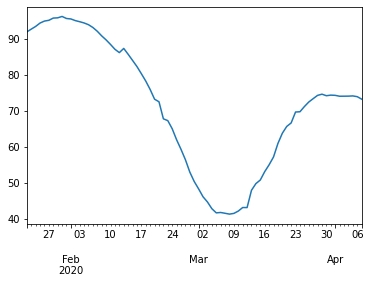

In [15]:
porcentagemAtivos = 100 - (mortalidade + taxaRecuperacao)
porcentagemAtivos.plot()

# Bases de dado unificada - Mundo

In [16]:
df_mundo = pd.concat([casosMundo,ativosMundo,recuperadosMundo,mortesMundo],axis=1)
df_mundo.columns = (['Casos','Ativos','Recuperados','Mortes'])
df_mundo.tail(10)

,Casos,Ativos,Recuperados,Mortes
2020-03-29,720140,537133,149082,33925
2020-03-30,782395,580247,164566,37582
2020-03-31,857487,637346,178034,42107
2020-04-01,932605,692619,193177,46809
2020-04-02,1013320,750074,210263,52983
2020-04-03,1095917,811334,225796,58787
2020-04-04,1197405,886647,246152,64606
2020-04-05,1272115,942729,260012,69374
2020-04-06,1345101,994021,276515,74565
2020-04-07,1426096,1044177,300054,81865


In [17]:
casosMundo.shape

(77,)

In [18]:
ativosMundo.shape

(77,)

In [19]:
recuperadosMundo.shape

(77,)

In [20]:
mortesMundo.shape

(77,)

Text(0.5, 0, 'Data')

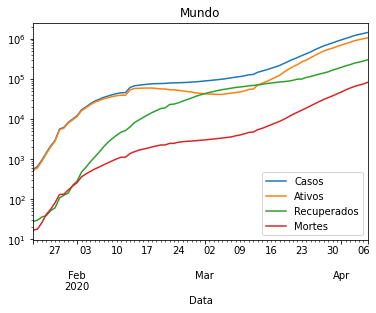

In [21]:
fig1 = df_mundo.plot(logy=True,title = 'Mundo')
fig1.set_xlabel('Data')

# Previsões - *Prophet*

In [22]:
def preProcess(country):
    
    nDays = casos[casos['Country/Region'] == country].iloc[:,4:casos.shape[1]].shape[1]
    
    d = {'Days':np.array(casos[casos['Country/Region'] == country].iloc[:,4:casos.shape[1]].columns),
         'Cases':np.sum(casos[casos['Country/Region'] == country].iloc[:,4:casos.shape[1]]),
         'Deaths':np.sum(mortes[mortes['Country/Region'] == country].iloc[:,4:mortes.shape[1]]),
         #Recovered':np.sum(recuperados[recuperados['Country/Region'] == country].iloc[:,4:recuperados.shape[1]])
        }

    df_country = pd.DataFrame(data=d)
    
    df_country=df_country[df_country['Cases']>100]
    
    return df_country

In [23]:
def prediction(df,predictionDays):
    originalNames = df.columns.values
    df.columns = ['ds','y']
    df['ds'] = pd.to_datetime(df['ds'])
    
    m = Prophet(interval_width=0.95)
    m.fit(df)
    future = m.make_future_dataframe(periods=predictionDays)
    pred = m.predict(future)
    
    df.columns = originalNames
    
    return m,pred

In [27]:
def trend(country,var,predictionDays,numberOfDaysToCreateTheModel):
    
    df_country = preProcess(country)

    df_train = df_country[:numberOfDaysToCreateTheModel][['Days',var]]
    
    df_test = df_country[numberOfDaysToCreateTheModel:][['Days',var]]
    df_test['Days'] = pd.to_datetime(df_test['Days'])
    
    
    m, pred = prediction(df_train,predictionDays)
    
    plt.figure(figsize=(12,8))
    plt.fill_between(pred['ds'],pred['yhat_lower'],pred['yhat_upper'],alpha = 0.2)
    plt.plot(pred['ds'],pred['yhat'],label='Model')
    plt.plot(df_train['Days'],df_train[var],'.k',label=country+'- training data')
    plt.plot(df_test['Days'],df_test[var],'oy',label=country+'- test data')
    #plt.ylim(1e02,1e05)
    plt.yscale('log')
    plt.legend(fontsize=16)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.xlabel('Days since the first 100 cases',fontsize=16)
    plt.title('Accumulated '+var+' ('+date.today().strftime("%B %d, %Y")+')'+'\n'+'Estimating next '+str(predictionDays)+ ' days',fontsize=18)
    plt.tight_layout()
    plt.savefig('covid19Results/estimating'+var+country+str(predictionDays)+'Days.jpeg')
    
    return df_country, m, pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


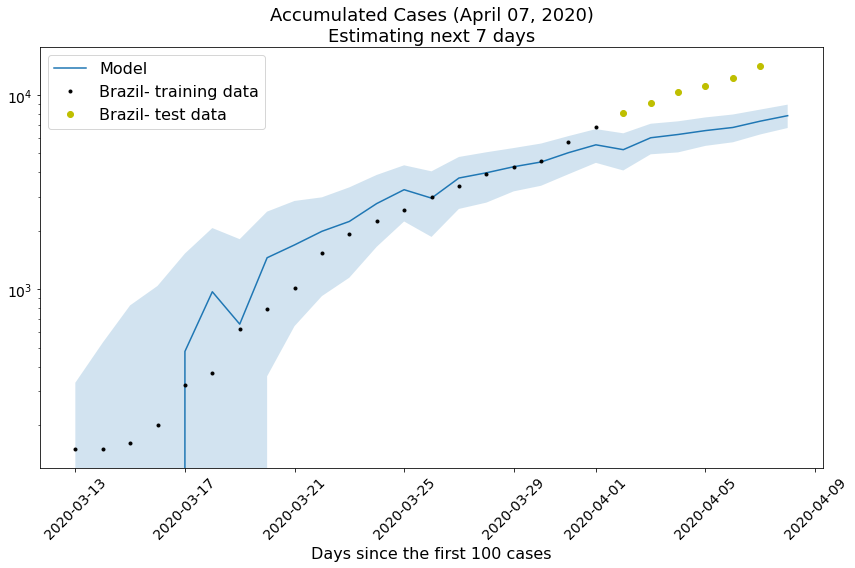

In [34]:
country = 'Brazil'
var='Cases'
predictionDays = 7
numberOfDaysToCreateTheModel = 20

df_country, m, pred = trend(country,var,predictionDays,numberOfDaysToCreateTheModel)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


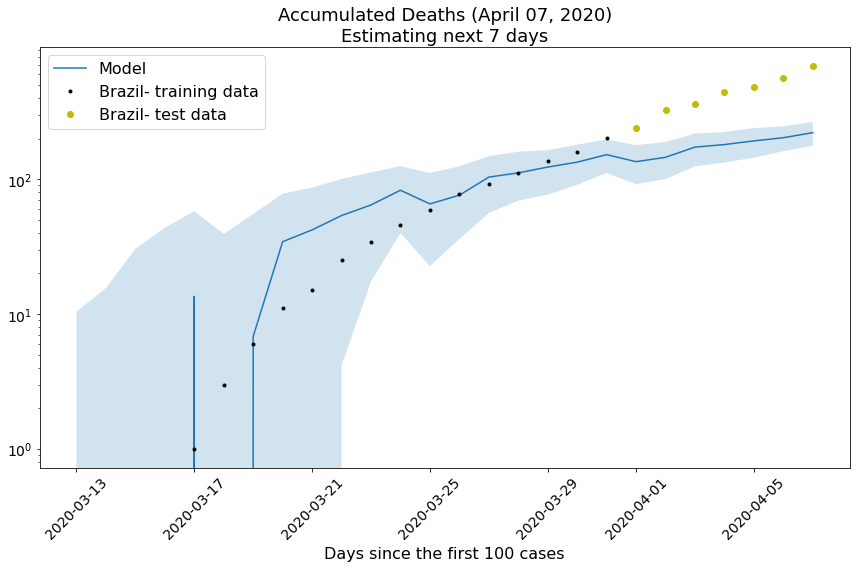

In [35]:
country = 'Brazil'
var='Deaths'
predictionDays = 7
numberOfDaysToCreateTheModel = df_country.shape[0] - predictionDays

df_country, m, pred = trend(country,var,predictionDays,numberOfDaysToCreateTheModel)

# Comparando países

In [30]:
def deltaT(df):
    df['Days'] = pd.to_datetime(df['Days'])
    df['deltaT'] = (df['Days'] - df['Days'].iloc[0]).dt.days 
    
    return df

In [31]:
df_brazil = preProcess('Brazil')
df_brazil = deltaT(df_brazil)

df_china = preProcess('China')
df_china = deltaT(df_china)

df_italy = preProcess('Italy')
df_italy = deltaT(df_italy)

df_japan = preProcess('Japan')
df_japan = deltaT(df_japan)

df_uk = preProcess('United Kingdom')
df_uk = deltaT(df_uk)

df_usa = preProcess('US')
df_usa = deltaT(df_usa)

df_germany = preProcess('Germany')
df_germany = deltaT(df_germany)

df_india = preProcess('India')
df_india = deltaT(df_india)

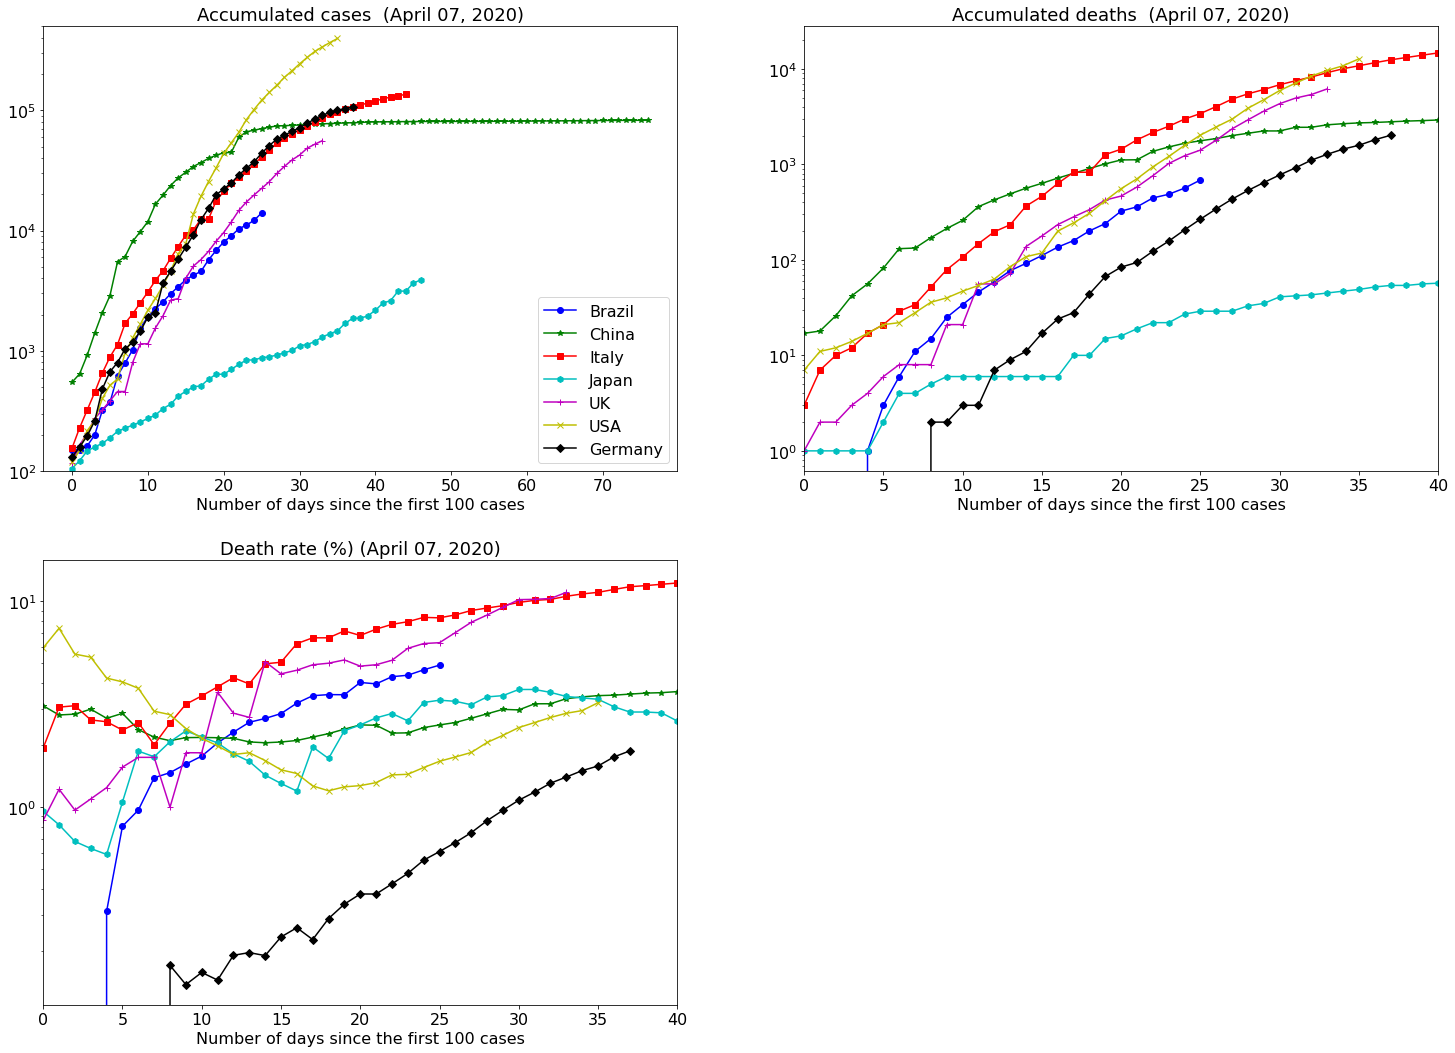

In [32]:
plt.figure(figsize=(25,18))

plt.subplot(221)
#plt.figure(figsize=(10,7))
plt.semilogy(df_brazil['deltaT'],df_brazil['Cases'],'-bo',label='Brazil')
plt.semilogy(df_china['deltaT'],df_china['Cases'],'-g*',label='China')
plt.semilogy(df_italy['deltaT'],df_italy['Cases'],'-rs',label='Italy')
plt.semilogy(df_japan['deltaT'],df_japan['Cases'],'-ch',label='Japan')
plt.semilogy(df_uk['deltaT'],df_uk['Cases'],'-m+',label='UK')
plt.semilogy(df_usa['deltaT'],df_usa['Cases'],'-yx',label='USA')
plt.semilogy(df_germany['deltaT'],df_germany['Cases'],'-kD',label='Germany')
#plt.xlim(0,40)
plt.ylim(1e02,5e05)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Accumulated cases  ('+date.today().strftime("%B %d, %Y")+')',fontsize=18)
plt.xlabel('Number of days since the first 100 cases',fontsize=16)

plt.subplot(222)
#plt.figure(figsize=(10,7))
plt.semilogy(df_brazil['deltaT'],df_brazil['Deaths'],'-bo',label='Brazil')
plt.semilogy(df_china['deltaT'],df_china['Deaths'],'-g*',label='China')
plt.semilogy(df_italy['deltaT'],df_italy['Deaths'],'-rs',label='Italy')
plt.semilogy(df_japan['deltaT'],df_japan['Deaths'],'-ch',label='Japan')
plt.semilogy(df_uk['deltaT'],df_uk['Deaths'],'-m+',label='UK')
plt.semilogy(df_usa['deltaT'],df_usa['Deaths'],'-yx',label='USA')
plt.semilogy(df_germany['deltaT'],df_germany['Deaths'],'-kD',label='Germany')
plt.xlim(0,40)
#plt.ylim(1e02,5e05)
#plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Accumulated deaths  ('+date.today().strftime("%B %d, %Y")+')',fontsize=18)
plt.xlabel('Number of days since the first 100 cases',fontsize=16)

plt.subplot(223)
#plt.figure(figsize=(10,7))
plt.semilogy(df_brazil['deltaT'],100*df_brazil['Deaths']/df_brazil['Cases'],'-bo',label='Brazil')
plt.semilogy(df_china['deltaT'],100*df_china['Deaths']/df_china['Cases'],'-g*',label='China')
plt.semilogy(df_italy['deltaT'],100*df_italy['Deaths']/df_italy['Cases'],'-rs',label='Italy')
plt.semilogy(df_japan['deltaT'],100*df_japan['Deaths']/df_japan['Cases'],'-ch',label='Japan')
plt.semilogy(df_uk['deltaT'],100*df_uk['Deaths']/df_uk['Cases'],'-m+',label='UK')
plt.semilogy(df_usa['deltaT'],100*df_usa['Deaths']/df_usa['Cases'],'-yx',label='USA')
plt.semilogy(df_germany['deltaT'],100*df_germany['Deaths']/df_germany['Cases'],'-kD',label='Germany')
plt.xlim(0,40)
#plt.ylim(1e02,5e05)
#plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Death rate (%) ('+date.today().strftime("%B %d, %Y")+')',fontsize=18)
plt.xlabel('Number of days since the first 100 cases',fontsize=16)

plt.savefig('covid19Results/covid19.jpeg')

In [33]:
df_brazil.tail(5)

,Days,Cases,Deaths,deltaT
4/3/20,2020-04-03,9056,359,21
4/4/20,2020-04-04,10360,445,22
4/5/20,2020-04-05,11130,486,23
4/6/20,2020-04-06,12161,564,24
4/7/20,2020-04-07,14034,686,25
